# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [42]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [43]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [44]:
type(mapbox_token)

str

# Import Data

In [45]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [56]:
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    housing_units_per_year = sfo_data['housing_units'].groupby(by='year').mean()
    
    fig_housing_units_per_year = plt.figure()
    
    housing_units_per_year_plot = housing_units_per_year.plot.bar(title="Average Housing Units per Year",figsize=(12,8), ylim =(372560-4000,384242+4000))
    
    plt.close(fig_housing_units_per_year)
    
    return fig_housing_units_per_year

In [57]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    avg_gross_rent = sfo_data['gross_rent'].groupby(by='year', level=None).mean()
    
    fig_avg_gross_rent = plt.figure()
    
    avg_gross_rent_plot = avg_gross_rent.plot.line('year', 'Gross Rent', title = 'Average Gross Rent per Year')
    
    return  fig_avg_gross_rent

In [58]:
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price = sfo_data['sale_price_sqr_foot'].groupby(by='year', level=None).mean()
    
    fig_avg_sale_price = plt.figure()

    avg_sale_price_plot = avg_gross_rent.plot.line(title = 'Average Sales Price per Year')
    
    return  fig_avg_sale_price

In [59]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    new_df = sfo_data.groupby(by=['year', 'neighborhood']).mean().reset_index()

    fig_average_price_by_neighborhood = plt.figure()
    
    new_df_plot = new_df.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    xlabel= 'Year',
    ylabel= 'Price per Sq Ft',
    title='Average Price per Sq Ft',
    groupby='neighborhood',
        ).opts(yformatter='%0f')
    
    return fig_average_price_by_neighborhood
    

In [60]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!
    top_10_expensive_neighborhoods= sfo_data.groupby(by=['neighborhood']).mean()
    top_10_expensive_neighborhoods.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.reset_index()
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.head(10)
    
    fig_top_10_expensive_neighborhoods = plt.figure()
    
    top_10_expensive_neighborhoods_plot = top_10_expensive_neighborhoods.hvplot.bar(
        x='neighborhood',
        y='sale_price_sqr_foot',
        title ='Top 10 expensive neighborhoods',
        rot=90,
        )
    
    return fig_top_10_expensive_neighborhoods

In [61]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    top_10_expensive_neighborhoods= sfo_data.groupby(by=['neighborhood']).mean()
    top_10_expensive_neighborhoods.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.reset_index()
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.head(10)
    
    parallel_coordinates_plot = px.parallel_coordinates(top_10_expensive_neighborhoods, color='sale_price_sqr_foot')
    
    return parallel_coordinates_plot

In [62]:
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    top_10_expensive_neighborhoods= sfo_data.groupby(by=['neighborhood']).mean()
    top_10_expensive_neighborhoods.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.reset_index()
    top_10_expensive_neighborhoods = top_10_expensive_neighborhoods.head(10)
    
    parallel_categories_plot = px.parallel_categories(
        top_10_expensive_neighborhoods,
        dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno)

    return parallel_categories_plot

In [63]:
def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_locations = pd.read_csv(file_path)
    avg_prices_per_neighborhood = sfo_data.groupby(by=['neighborhood']).mean().reset_index()
    avg_prices_neighborhood_locations = pd.concat([avg_prices_per_neighborhood, df_neighborhood_locations], axis='columns', join = 'inner')

    px.set_mapbox_access_token(mapbox_token)
    
    neighborhood_map = px.scatter_mapbox(
    avg_prices_neighborhood_locations,
    lat='Lat',
    lon='Lon',
    color_continuous_scale=px.colors.cyclical.Edge,
    size='sale_price_sqr_foot',
    color='gross_rent',
    title='Average Sale Price per Square Foot and Gross Rent in San Francisco'
)
    
    return neighborhood_map

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [114]:
title = 'San Francisco Housing Rental Analysis'
SF_real_estate = pn.Row(pn.Column(title), neighborhood_map())

In [115]:
market_trends = housing_units_per_year

In [116]:
neighborhood_analysis = pn.Column(
    "# Top 10 Neighborhoods", top_most_expensive_neighborhoods(), average_price_by_neighborhood
())

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [117]:
parallel_column = pn.Column("Parellel Coordinates Plot", parallel_coordinates(), 
                            parallel_categories())

In [119]:
panel = pn.Tabs(
    ("San Francisco Real Estate Advisors", SF_real_estate),
    ("Top 10 Neighborhoods", neighborhood_analysis))
#     ("Market Trends", market_trends)
#     ("Statistical Plots", parallel_column)
# )

                

## Serve the Panel Dashboard

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
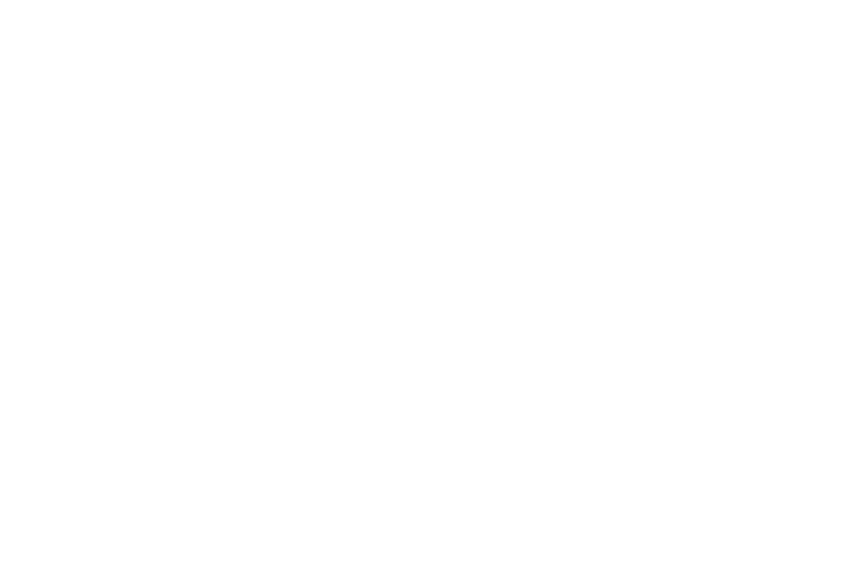
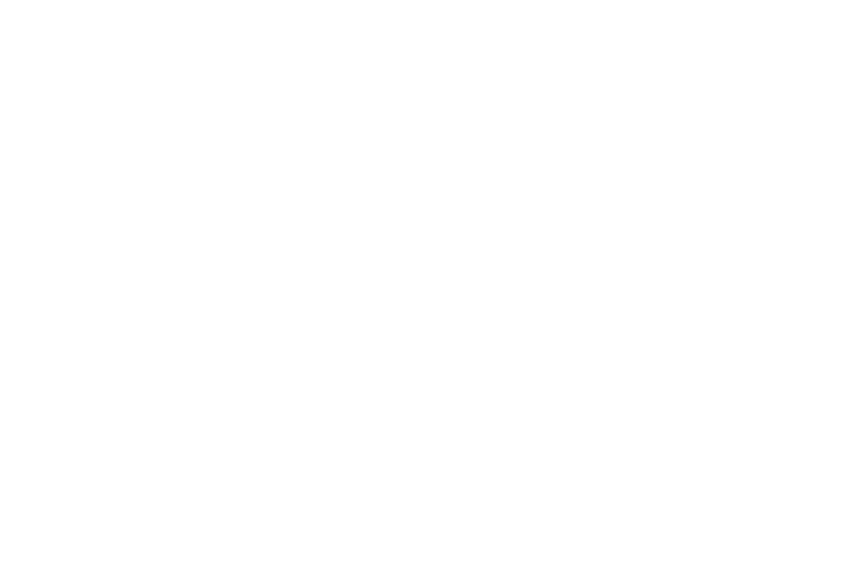

In [120]:
panel.servable()